### Mathew Collins
#### DSC 550: Week 9/10
#### 9.3 Exercise: Neural Network Classifiers

## 1.  Neural Network Classifier with Scikit

In [345]:
# Import Libraries to use
import json
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quefi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Create variable to hold the file name
f = 'categorized-comments.jsonl'

In [3]:
# Read the JSON file into a data frame
df = pd.read_json(f, lines = True)

In [4]:
# view the dataframe
df

,cat,txt
0,sports,Barely better than Gabbert? He was significant...
1,sports,Fuck the ducks and the Angels! But welcome to ...
2,sports,Should have drafted more WRs.\n\n- Matt Millen...
3,sports,[Done](https://i.imgur.com/2YZ90pm.jpg)
4,sports,No!! NOO!!!!!
...,...,...
606470,video_games,&gt;any chance we can install the entire conte...
606471,video_games,No. It's probably only happened to you
606472,video_games,I think most of the disappointment came from t...
606473,video_games,"dishonored 1/2 looked like arse, so what the h..."


In [5]:
df['cat'].value_counts()

video_games               435541
sports                    145823
science_and_technology     25111
Name: cat, dtype: int64

In [6]:
df['cat'].value_counts() / len(df['cat'])

video_games               0.718152
sports                    0.240444
science_and_technology    0.041405
Name: cat, dtype: float64

In [22]:
# grab a subset of the data.  My computer cannot handle 600k+ rows

smp_df = df.sample(4000)
smp_df['cat'].value_counts()/len(smp_df['cat'])

video_games               0.71675
sports                    0.23850
science_and_technology    0.04475
Name: cat, dtype: float64

### The original data vs. the sampl data remains aligned with the 3 categories:

* video_games = 0.718 vs. 0.717
* sports = 0.240 vs. 0.239
* science_and_technology = 0.041 vs. 0.045

In [10]:
# Tokenize the txt column

word_tokens = [nltk.word_tokenize(item) for item in smp_df['txt']]

In [11]:
# Create a class list

list_smp_cat = smp_df['cat']
classes = []

for cat in list_smp_cat:
    if cat not in classes:
        classes.append(cat)

classes

['video_games', 'sports', 'science_and_technology']

In [12]:
# Create function to stem sentences of the data frame

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


In [23]:
# Clean up the txt column

smp_df['txt'] = smp_df['txt'].str.replace('\d+', '')  # remove numbers from column

smp_df['txt'] = smp_df['txt'].str.replace(r'[^a-zA-Z ]+', '').str.strip() # remove special characters

smp_df['txt'] = smp_df['txt'].str.lower()  # all letters changed to lowercase



In [24]:
# Stem and create bage of words

from nltk.stem import PorterStemmer # import the PorterStemmer
ps = PorterStemmer()  # create the stemmer

smp_df['stem_txt'] = smp_df['txt'].apply(stem_sentences) # stem each sentence

smp_df = smp_df.drop(columns = ['txt'])  # drop unstemmed column

vect = CountVectorizer(stop_words = ENGLISH_STOP_WORDS, max_features = 12000)

vect.fit(smp_df['stem_txt'])

X_review = vect.transform(smp_df['stem_txt'])

X_df = pd.DataFrame(X_review.toarray(), columns = vect.get_feature_names())

X_df.head()

,aa,aaa,aaaayyyyy,aakash,aaron,ab,abaddon,abaddonalso,abandon,abhor,...,zito,zoidberg,zombi,zomg,zone,zoneread,zoom,zsne,zte,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Create the variables and split the dataset

y = smp_df['cat']  # feature to predict
X = X_df           # information used to create prediction 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1200 rows in test set vs. 2800 in training set. 8516 Features.


In [57]:
# Create the sklearn model
from sklearn.metrics import accuracy_score, precision_score, recall_score

model = MLPClassifier(hidden_layer_sizes = [500, 150], verbose = True)
model.fit(X_train, y_train)

pred_y = model.predict(X_test)



Iteration 1, loss = 0.80878843
Iteration 2, loss = 0.57732967
Iteration 3, loss = 0.38831749
Iteration 4, loss = 0.23347717
Iteration 5, loss = 0.14153440
Iteration 6, loss = 0.09574963
Iteration 7, loss = 0.07315140
Iteration 8, loss = 0.06173797
Iteration 9, loss = 0.05701393
Iteration 10, loss = 0.05389625
Iteration 11, loss = 0.05208351
Iteration 12, loss = 0.05068162
Iteration 13, loss = 0.04776095
Iteration 14, loss = 0.04869341
Iteration 15, loss = 0.04733470
Iteration 16, loss = 0.04826064
Iteration 17, loss = 0.04710343
Iteration 18, loss = 0.04841903
Iteration 19, loss = 0.04975706
Iteration 20, loss = 0.04989444
Iteration 21, loss = 0.05342719
Iteration 22, loss = 0.05160714
Iteration 23, loss = 0.04627131
Iteration 24, loss = 0.04849997
Iteration 25, loss = 0.04583986
Iteration 26, loss = 0.04569236
Iteration 27, loss = 0.04636213
Iteration 28, loss = 0.04787328
Iteration 29, loss = 0.04547973
Iteration 30, loss = 0.04612783
Iteration 31, loss = 0.04621145
Iteration 32, los

In [58]:
# Calculate the different model scores

acc_score = accuracy_score(y_test, pred_y)*100
prec_score = precision_score(y_test, pred_y, average='micro')*100
recall_score = recall_score(y_test, pred_y, average= 'micro')*100
f1score = f1_score(y_test, pred_y, average = 'micro')*100

print('Accuracy Score =', acc_score)
print('Precision Score =', prec_score)
print('Recall Score =', recall_score)
print('F1 Score =', f1score)

Accuracy Score = 76.16666666666667
Precision Score = 76.16666666666667
Recall Score = 76.16666666666667
F1 Score = 76.16666666666667


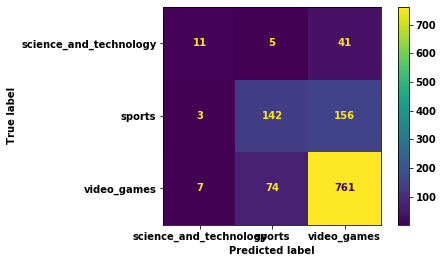

In [66]:
# Create confusion matrix

import matplotlib as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, values_format ='.0f')


## 2. Neural Network Classifier with Keras

In [159]:
# import the keras libraries to be used.

from keras.models import Sequential
from keras import layers
from sklearn.metrics import f1_score
from keras.backend import clear_session
from keras.utils import to_categorical
from keras.utils import np_utils

In [ ]:
# Create a function to convert string categories into numbers

y_cats = []
def convert(x):
    for i in x:
        if i == 'video_games':
            i = 0
            y_cats.append(i)

        elif i == 'sports':
            i = 1
            y_cats.append(i)
            
        elif i == 'science_and_technology':
            i = 2
            y_cats.append(i)
    
    return y_cats
    


In [ ]:
# Convert the string categories into numbers

y_cats = convert(smp_df['cat'])

In [ ]:
# Convert one hot encode labels and convert to categories

y_cat2 = np_utils.to_categorical(y_cats)


In [ ]:
# Create the x and y to split for the model

y = y_cat2         # feature to predict
X = X_df           # this is the same vector created as part of step 1.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [254]:
# Create the neural network keras model

input_dim = X_train.shape[1]
N_classes = 3

model_seq = Sequential()
model_seq.add(layers.Dense(500, input_dim = input_dim, kernel_initializer = 'uniform', activation = 'relu'))
model_seq.add(layers.Dense(150, kernel_initializer = 'uniform', activation = 'relu'))
model_seq.add(layers.Dense(3, activation = 'softmax'))
model_seq.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics =['accuracy'])


In [255]:
# Summarize the neural network
model_seq.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               4258500   
_________________________________________________________________
dense_2 (Dense)              (None, 150)               75150     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 453       
Total params: 4,334,103
Trainable params: 4,334,103
Non-trainable params: 0
_________________________________________________________________


In [256]:
# Fit the model

model_seq.fit(X_train, y_train, batch_size = 128, epochs = 100)

Epoch 1/100
2800/2800 [==============================] - 1s 401us/step - loss: 0.8140 - accuracy: 0.7007
Epoch 2/100
2800/2800 [==============================] - 1s 370us/step - loss: 0.5665 - accuracy: 0.7296
Epoch 3/100
2800/2800 [==============================] - 1s 386us/step - loss: 0.3590 - accuracy: 0.8489
Epoch 4/100
2800/2800 [==============================] - 1s 402us/step - loss: 0.2106 - accuracy: 0.9232
Epoch 5/100
2800/2800 [==============================] - 1s 370us/step - loss: 0.1384 - accuracy: 0.9468
Epoch 6/100
2800/2800 [==============================] - 1s 406us/step - loss: 0.0967 - accuracy: 0.9689
Epoch 7/100
2800/2800 [==============================] - 1s 408us/step - loss: 0.0734 - accuracy: 0.9761
Epoch 8/100
2800/2800 [==============================] - 1s 381us/step - loss: 0.0611 - accuracy: 0.9811
Epoch 9/100
2800/2800 [==============================] - 1s 363us/step - loss: 0.0569 - accuracy: 0.9821
Epoch 10/100
2800/2800 [==============================]

In [257]:
# predict the value

y_pred = model_seq.predict(X_test)

In [258]:
# Calculate the accuracy metrics (additional scoring below, wanted to test this out)
loss, accuracy = model_seq.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model_seq.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))



Training Accuracy: 0.9825
Testing Accuracy:  0.7158


In [ ]:
# Create a function to convert to string categories

y_category=[]

def convert_back(x):
    
    for i in x:
        if i == 0:
            i = 'video_games'
            y_category.append(i)

        elif i == 1:
            i = 'sports'
            y_category.append(i)
            
        elif i == 2:
            i = 'science_and_technology'
            y_category.append(i)
    
    return y_category

In [ ]:
# Convert the one-hot encoded labels back to a single category number

y_pred_class = np.argmax(y_pred, axis = 1)
y_test_class = np.argmax(y_test, axis = 1)

In [ ]:
# Convert the numeric categories to string values

y_pred_to_class = convert_back(y_pred_class)
y_test_to_class = convert_back(y_test_class)

In [371]:
# Ensure the conversion went to the proper length

print('Predicted length:', len(y_pred_to_class))
print('Test length:', len(y_test_to_class))

Predicted length: 1200
Test length: 1200


In [404]:
# Calculate scoring

acc_score2 = accuracy_score(y_test_to_class, y_pred_to_class)*100
prec_score2 = precision_score(y_test_to_class, y_pred_to_class, average='micro')*100
f1score2 = f1_score(y_test_to_class, y_pred_to_class, average = 'micro')*100

print('Accuracy Score =', acc_score2)
print('Precision Score =', prec_score2)
print('F1 Score =', f1score2)

Accuracy Score = 71.58333333333333
Precision Score = 71.58333333333333
F1 Score = 71.58333333333334


In [403]:
# Calculate scoring using precision_recall_fscore_support
# Wanted to test this approach out, something I read about 

from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test_to_class, y_pred_to_class)

print('precision', precision)
print('recall', recall)
print('fscpre', fscore)
print('support', support)

# This scoring provides a interesting perspective on the unbalanced data, compared to the average scoring.

precision [0.3        0.54464286 0.76464435]
recall [0.11111111 0.39869281 0.8702381 ]
fscpre [0.16216216 0.46037736 0.81403118]
support [ 54 306 840]


In [253]:
# Clears the session
clear_session()

In [262]:
# view the categories
classes

['video_games', 'sports', 'science_and_technology']

[Text(0, 0.5, 'science_and_technology'),
 Text(0, 1.5, 'sports'),
 Text(0, 2.5, 'video_games')]

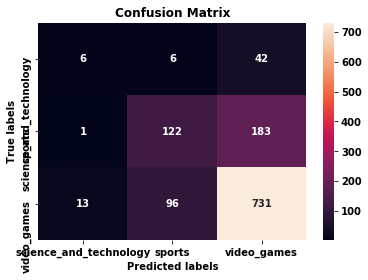

In [357]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=".0f"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['science_and_technology', 'sports', 'video_games'])
ax.yaxis.set_ticklabels(['science_and_technology', 'sports', 'video_games'])


## 3. Classifying Images

In [372]:
# Import the libraries

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K



In [373]:
# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set the seed
np.random.seed(0)

In [374]:
# Set the image information
channels = 1
height = 28
width = 28


In [375]:
# Load data and target from MNIST data

(data_train, target_train), (data_test, target_test) = mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [376]:
# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)


In [377]:
# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255


In [378]:
# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]


In [380]:
# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation = 'softmax'))


In [381]:
# Complile the neural network

network.compile(loss = 'categorical_crossentropy',
               optimizer = 'rmsprop',
               metrics = ['accuracy'])

In [382]:
# Train the neural network
network.fit(features_train, target_train, epochs = 2, verbose = 0, 
            batch_size = 1000, validation_data = (features_test, target_test))

In [383]:
# Summary of the neural network
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 24, 24)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 12, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 12, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [387]:
# Calculate the accuracy results

loss, accuracy = network.evaluate(data_train, target_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = network.evaluate(data_test, target_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Training Accuracy: 0.9694
Testing Accuracy:  0.9685
